<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-&amp;-Model-Load" data-toc-modified-id="Data-&amp;-Model-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data &amp; Model Load</a></span></li><li><span><a href="#Devolution" data-toc-modified-id="Devolution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Devolution</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></div>

In [1]:
import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from model import SimpleCNNDeconv
from saliency.attribution_methods import DeconvNet
from saliency.ensembles import *
from utils import get_samples, visualize_saliencys

# Data & Model Load

**MNIST**

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')
mnist_model_deconv = SimpleCNNDeconv('mnist')

Data Complete
Model Complete


**CIFAR10**

In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')
cifar10_model_deconv = SimpleCNNDeconv('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Devolution

In [4]:
mnist_deconvnet = DeconvNet(mnist_model, mnist_model_deconv)
cifar10_deconvnet = DeconvNet(cifar10_model, cifar10_model_deconv)

# MNIST

In [5]:
# vanilla gradients
outputs, probs, preds = mnist_deconvnet.generate_image(pre_images_mnist, original_targets_mnist, layer=0)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_deconvnet, layer=0)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_deconvnet, layer=0)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_deconvnet, layer=0)

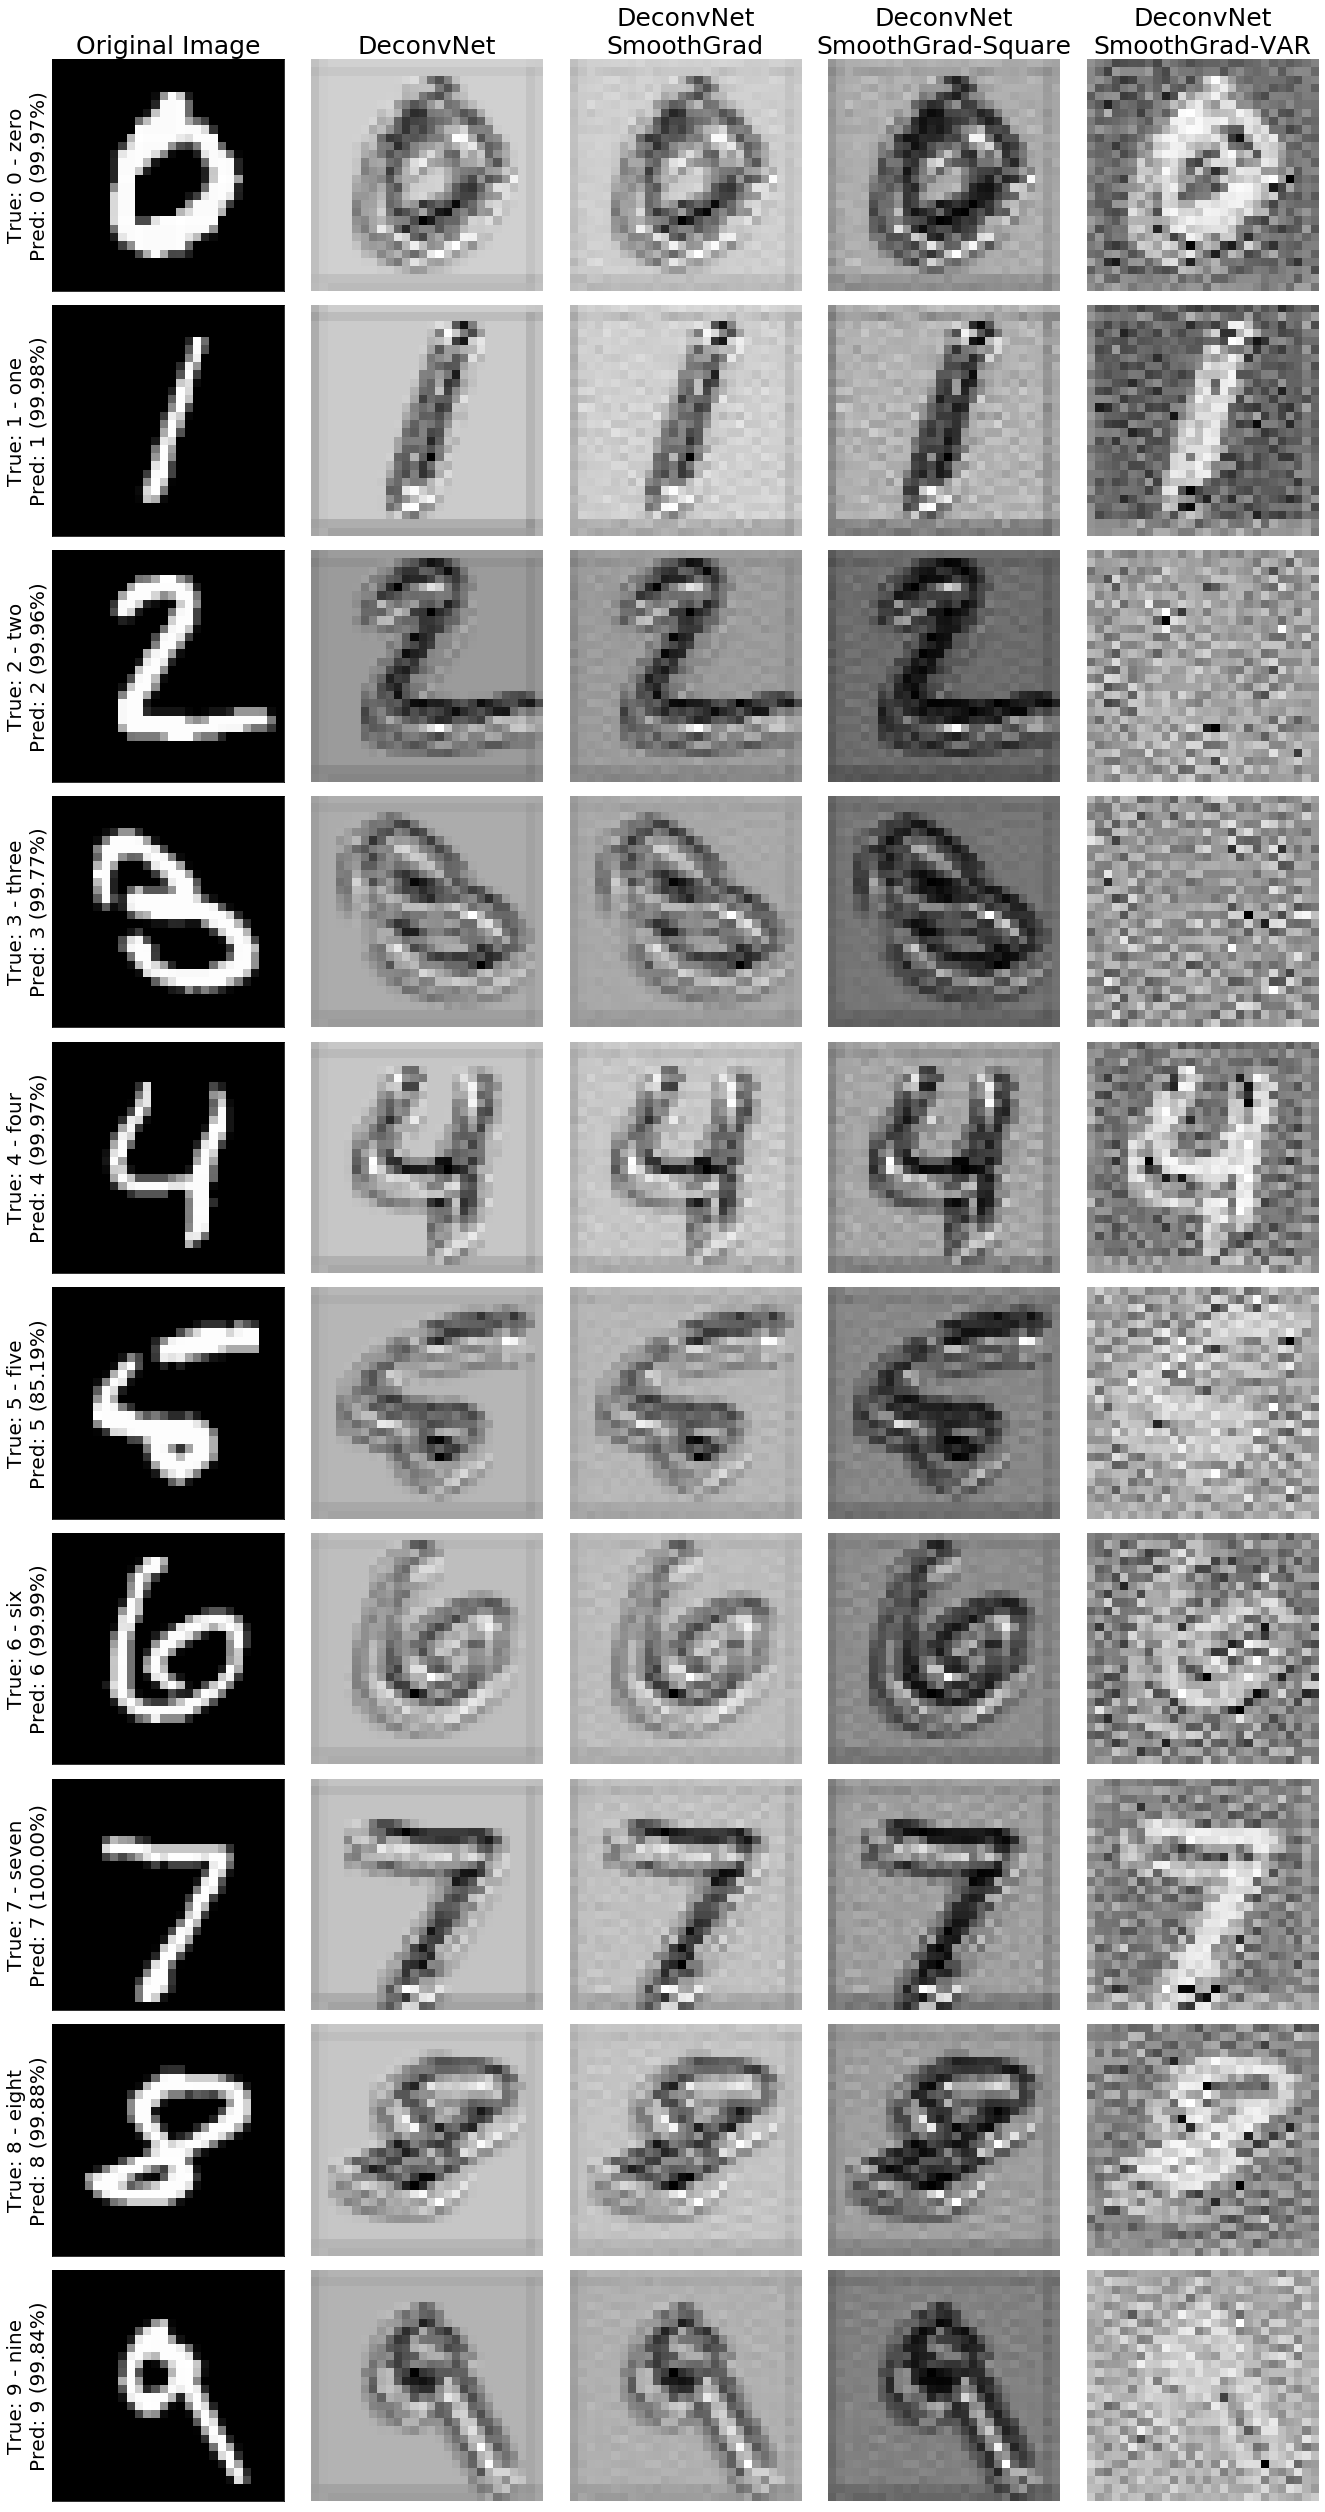

In [6]:
names = ['DeconvNet',
         'DeconvNet\nSmoothGrad','DeconvNet\nSmoothGrad-Square','DeconvNet\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [8]:
# vanilla gradients
outputs, probs, preds = cifar10_deconvnet.generate_image(pre_images_cifar10, original_targets_cifar10, layer=0)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_deconvnet, layer=0)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_deconvnet, layer=0)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_deconvnet, layer=0)

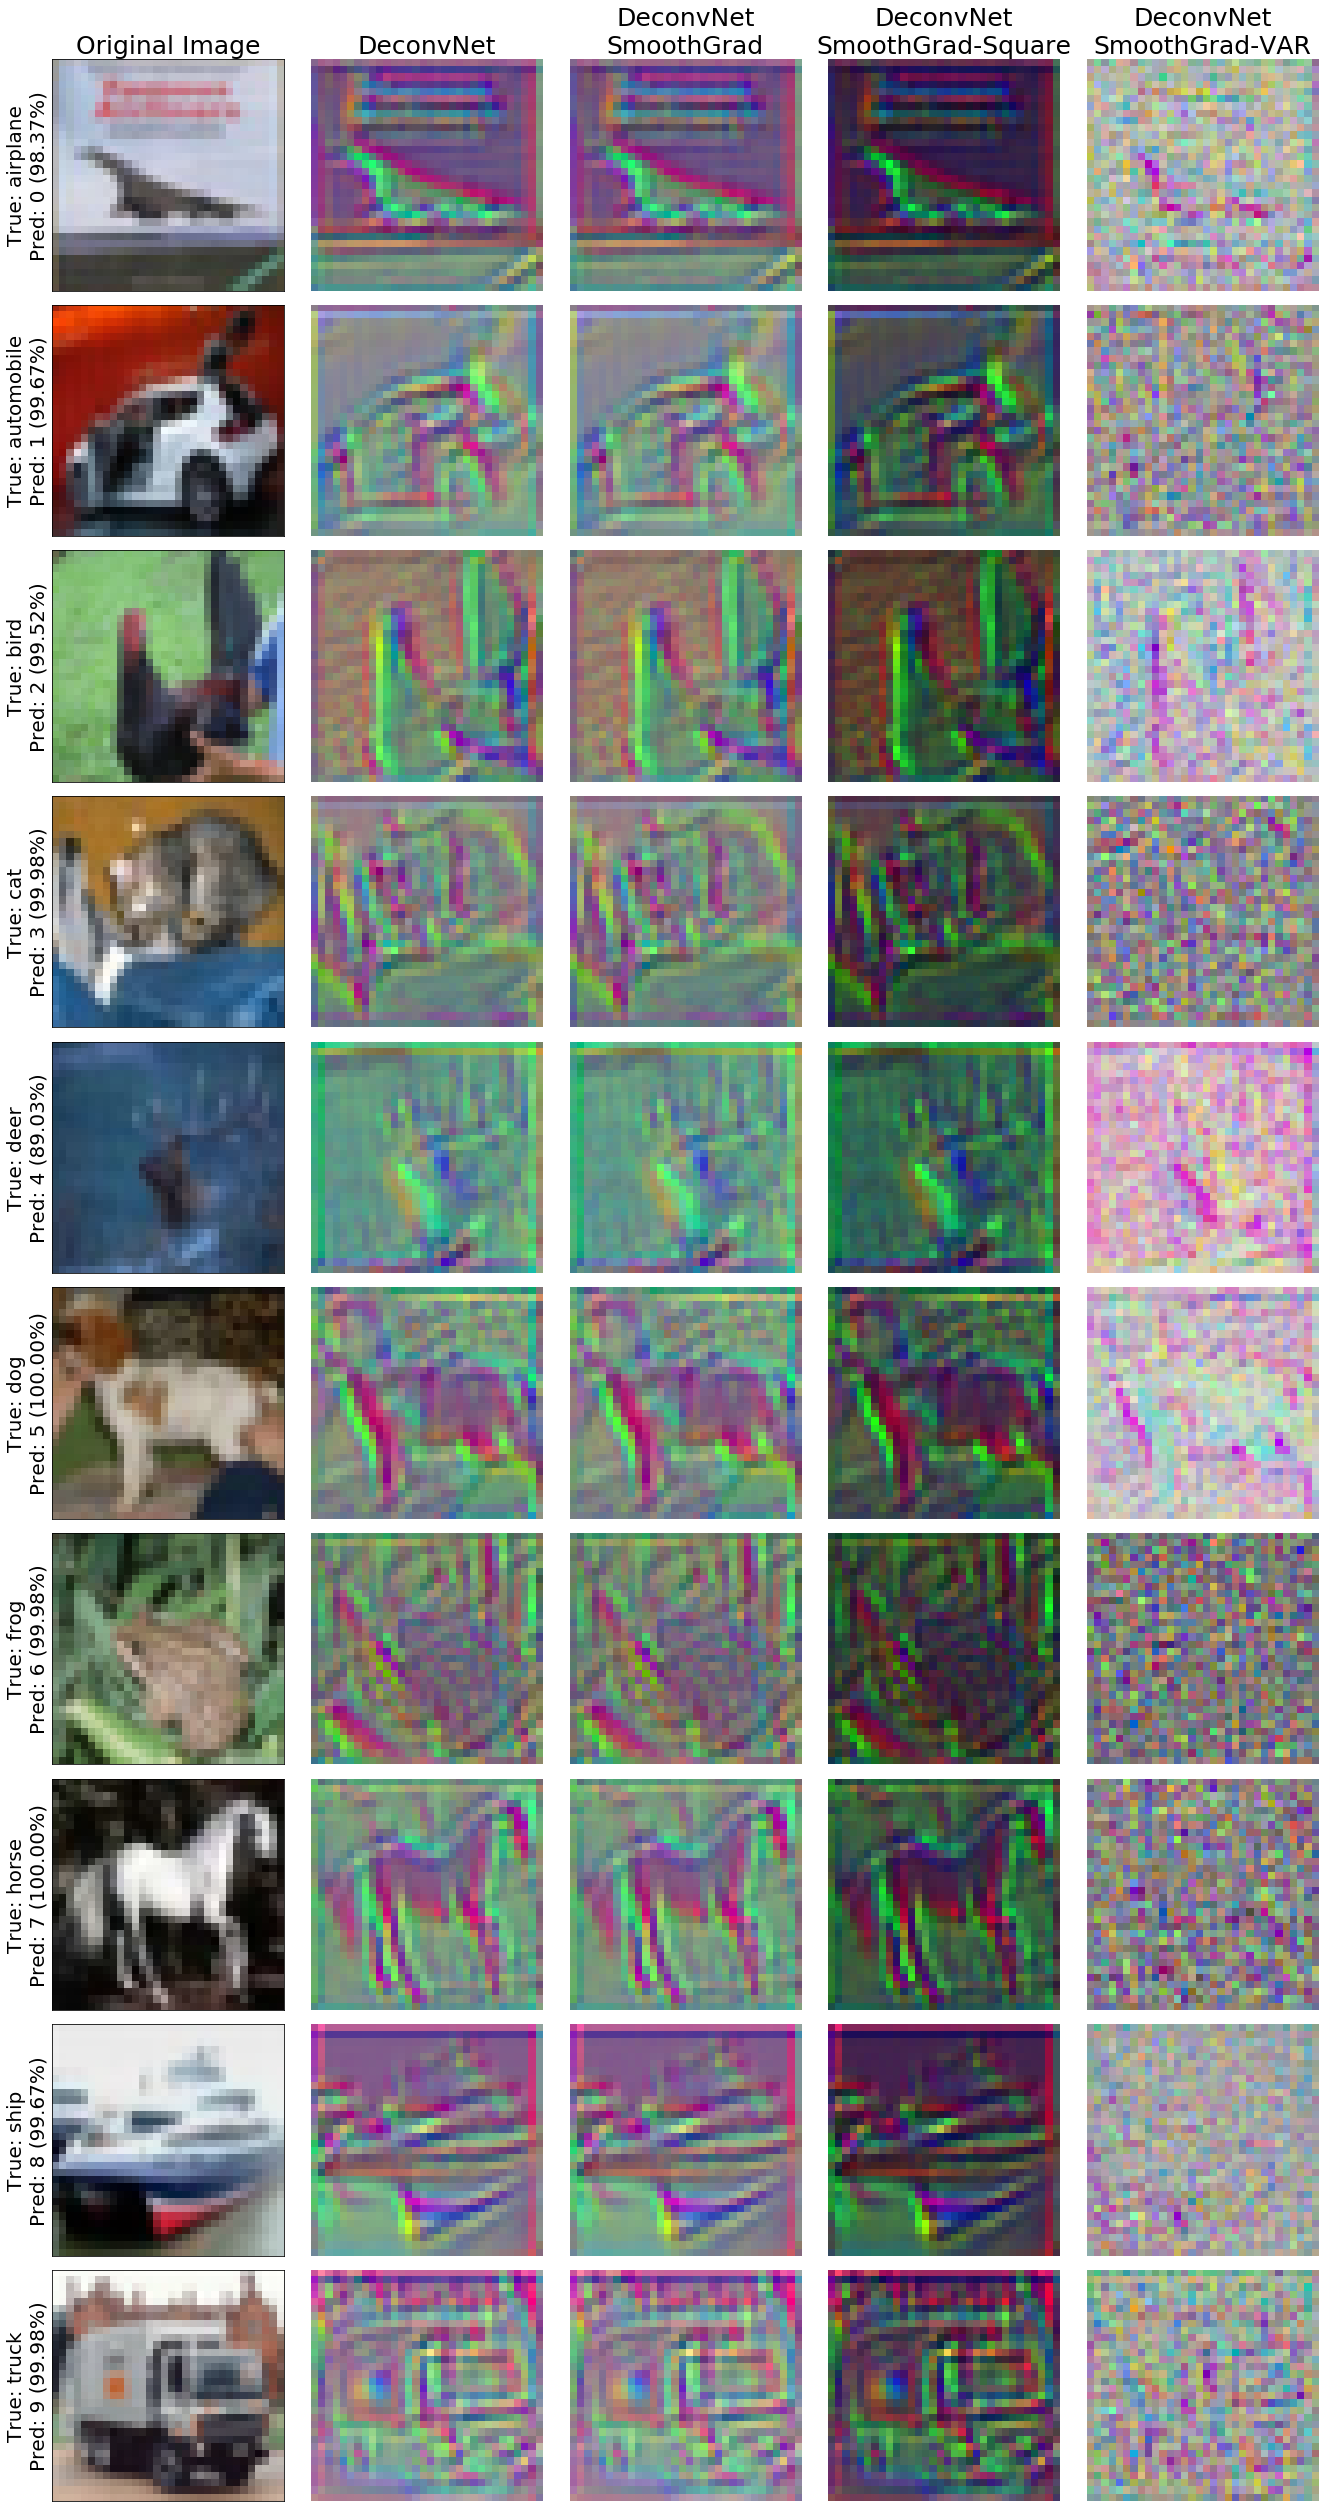

In [9]:
names = ['DeconvNet',
         'DeconvNet\nSmoothGrad','DeconvNet\nSmoothGrad-Square','DeconvNet\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)